In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os

os.getcwd()

'C:\\Users\\JAAL_\\Documents\\Sincronizar_Drive\\Tesis\\codigos-jupyter\\Magnetometria-NV\\Resultados-tiettene-con-corriente'

In [2]:
# Para regresar a la carpeta
os.chdir('C:/Users/JAAL_/Documents/Sincronizar_Drive/Tesis/codigos-jupyter/Magnetometria-NV/Resultados-tiettene-con-corriente/')

# Explicación de la data por Tietenne para step 0

Esta carpeta contiene los datos ODMR crudos en dos archivos binarios, uno para los datos en presencia de una corriente I = 4 mA ('ODMR_data_with_current'), y el otro para los datos sin corriente aplicada ('ODMR_data_without_current').

Cada archivo contiene la intensidad de PL cruda (en cuentas) para cada píxel de la cámara y para cada frecuencia de microondas del escaneo, escrita en una sola columna.
Cada fotograma de la cámara tiene 1024 x 1024 píxeles con un tamaño físico de píxel de 108 nm x 108 nm, y hay 281 frecuencias de microondas.
Además, para cada frecuencia se toman 2 fotogramas (uno con microondas encendidas y otro con microondas apagadas) para permitir la eliminación de fluctuaciones de modo común.
Esto da un total de 1024 x 1024 x 281 x 2 valores de intensidad de PL.

La variable 'PL_norm' es una matriz de 1024 x 1024 x 281 que representa los mapas de intensidad de PL normalizados (microondas encendidas/apagadas) (1024 x 1024 píxeles) para cada una de las 281 frecuencias de microondas. La variable 'freq' es el vector de frecuencia de microondas (expresado en MHz) correspondiente a este conjunto de datos.

## Abrimos la data y transformamos a una matriz adecuada

In [3]:
os.chdir('C:/Users/JAAL_/Documents/ODMR-jupyter-calculo-magnetometria/Datos-tiettene/datos/Step 0 - Raw ODMR data')
    
    
file_name = "ODMR_data_with_current"
# file_name = "ODMR_data_without_current"

# Abre el archivo
with open(file_name, 'rb') as fileID:
    # Lee el contenido del archivo como números de precisión simple (float32)
    data = fileID.read()
    # Convertir los datos leídos en un array numpy de tipo float32
    temp = np.frombuffer(data, dtype=np.float32)

### Vemos lo que tiene los archivos
display(temp.shape)
temp
    
# Descartar los dos primeros elementos
temp = temp[2:]
display(temp.shape)

# Reshape del array según las dimensiones especificadas
PL_raw = np.reshape(temp, (2 * 281, 1024, 1024))

# Extraer PL_MW_on y PL_MW_off
# En numpy, el slicing (corte de segmentos del array) se realiza utilizando la notación [inicio:fin:paso] 
# Ojo con esto que es demasiado util este slicing
PL_MW_on = PL_raw[ 0:2*281:2,:,:]
PL_MW_off = PL_raw[1:2*281:2,:,:]

# Calcular PL_norm
PL_norm = PL_MW_on / PL_MW_off
PL_norm = PL_norm/PL_norm.max()

# Definir el vector de frecuencia
freq = np.arange(2730, 3011)

# Imprimir los resultados para verificar
print("PL_norm shape:", PL_norm.shape)
print("freq shape", freq.shape)
print("freq:", freq)

(589299714,)

(589299712,)

PL_norm shape: (281, 1024, 1024)
freq shape (281,)
freq: [2730 2731 2732 2733 2734 2735 2736 2737 2738 2739 2740 2741 2742 2743
 2744 2745 2746 2747 2748 2749 2750 2751 2752 2753 2754 2755 2756 2757
 2758 2759 2760 2761 2762 2763 2764 2765 2766 2767 2768 2769 2770 2771
 2772 2773 2774 2775 2776 2777 2778 2779 2780 2781 2782 2783 2784 2785
 2786 2787 2788 2789 2790 2791 2792 2793 2794 2795 2796 2797 2798 2799
 2800 2801 2802 2803 2804 2805 2806 2807 2808 2809 2810 2811 2812 2813
 2814 2815 2816 2817 2818 2819 2820 2821 2822 2823 2824 2825 2826 2827
 2828 2829 2830 2831 2832 2833 2834 2835 2836 2837 2838 2839 2840 2841
 2842 2843 2844 2845 2846 2847 2848 2849 2850 2851 2852 2853 2854 2855
 2856 2857 2858 2859 2860 2861 2862 2863 2864 2865 2866 2867 2868 2869
 2870 2871 2872 2873 2874 2875 2876 2877 2878 2879 2880 2881 2882 2883
 2884 2885 2886 2887 2888 2889 2890 2891 2892 2893 2894 2895 2896 2897
 2898 2899 2900 2901 2902 2903 2904 2905 2906 2907 2908 2909 2910 2911
 2912 2913 2914 2915

La variable 'PL_norm' es una matriz de 1024 x 1024 x 281 que representa los mapas de intensidad de PL normalizados (microondas encendido/apagado) (1024 x 1024 píxeles) para cada una de las 281 frecuencias de microondas. La variable 'freq' es el vector de frecuencia de microondas (expresado en MHz) correspondiente a este conjunto de datos.

En esta carpeta también hay imágenes .png que muestran el mapa PL para una frecuencia determinada, así como el espectro ODMR resumido en toda la imagen.

## Graficamos la imagen para una frecuencia

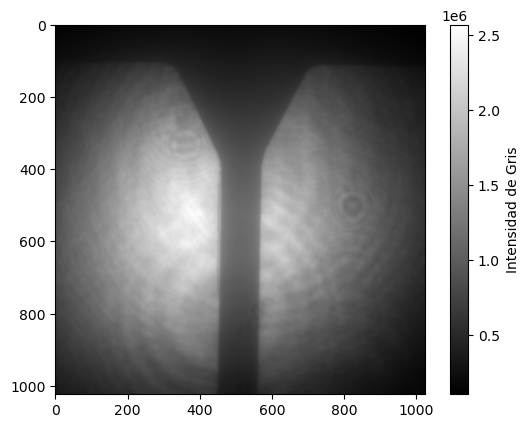

In [5]:
import matplotlib.pyplot as plt
import numpy as np
fluorescencia = PL_MW_on[10,:,:]

# Para regresar a la carpeta
os.chdir('C:/Users/JAAL_/Documents/Sincronizar_Drive/Tesis/codigos-jupyter/Magnetometria-NV/Resultados-tiettene-con-corriente/')

# Mostrar la imagen usando matplotlib
plt.imshow(fluorescencia, cmap='gray')  # 'gray' para imágenes en escala de grises
plt.colorbar(label='Intensidad de Gris')  # Añadir la barra de colores con etiqueta
plt.axis('on')  # Desactivar los ejes

plt.savefig('./fluorescencia.png')
plt.show()

## Graficamos el ODMR

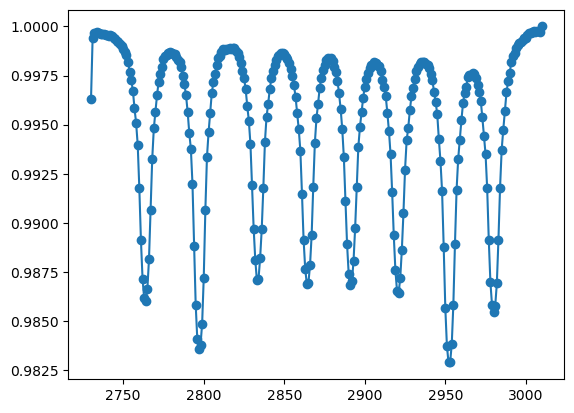

In [5]:
ODMR = np.sum(PL_norm, axis=(1,2))
ODMR = ODMR/ODMR.max()
plt.plot(freq,ODMR,'o-')
plt.savefig('./ODMR-suma-espectro.png')
plt.show()

# Explicación por Tietenne para step 1

Esta carpeta contiene el resultado del ajuste de los datos ODMR sin procesar, es decir, la frecuencia, el contraste y el ancho de cada una de las 8 líneas de resonancia observadas en los espectros.

Para obtener estos resultados, los datos ODMR sin procesar, es decir, matrices 2D de la intensidad PL para un rango de frecuencias de microondas, fueron rebinados utilizando 'imresize' en Matlab.
Esto reduce el tamaño de la matriz de 1024 x 1024 a 256 x 256. El tamaño físico del píxel después de rebinado es de 432 nm x 432 nm.
El espectro ODMR en cada píxel se ajustó a una suma de 8 funciones Lorentzianas con frecuencias, amplitud (contraste) y ancho libres.

Hay tres subcarpetas diferentes en esta carpeta: una para frecuencia, una para contraste y una para ancho.
En cada carpeta, hay 8 archivos de texto, uno para cada línea ODMR vista en los espectros.
Están numerados del 1 al 8 en orden de frecuencia de resonancia creciente (es decir, 1 es la frecuencia más pequeña y 8 es la más grande).

Cada archivo de texto (por ejemplo, 'freq_1.txt') contiene una matriz de 256 x 256 de la cantidad dada (por ejemplo, la frecuencia de la primera línea de resonancia).
La matriz se puede importar y graficar directamente en Matlab utilizando 'imagesc' para obtener la imagen en el espacio real de esa cantidad.

Además, como guía, en esta carpeta hay una imagen .png que muestra la proyección del campo magnético $B_{NV}$ a lo largo de cada eje NV, obtenida utilizando la fórmula aproximada:
\begin{align*}
B_{NV_1} &= \frac{\text{freq}_8 - \text{freq}_1}{2 \times 2.8 \, \text{MHz/G}} \\
B_{NV_2} &= \frac{\text{freq}_7 - \text{freq}_2}{2 \times 2.8 \, \text{MHz/G}} \\
B_{NV_3} &= \frac{\text{freq}_6 - \text{freq}_3}{2 \times 2.8 \, \text{MHz/G}} \\
B_{NV_4} &= \frac{\text{freq}_5 - \text{freq}_4}{2 \times 2.8 \, \text{MHz/G}}
\end{align*}

Para referencia futura, los vectores unitarios que definen el eje de simetría de cada familia NV son los siguientes (fijados por el campo magnético externo):


- frequencies 1 and 8 correspond to NV unit vector $\left[0,-\sqrt{\frac{2}{3}},-\sqrt{\frac{1}{3}}\right]$ 
- frequencies 2 and 7 correspond to NV unit vector $\left[\sqrt{\frac{2}{3}},0,-\sqrt{\frac{1}{3}}\right]$    
- frequencies 3 and 6 correspond to NV unit vector $\left[-\sqrt{\frac{2}{3}},0,-\sqrt{\frac{1}{3}}\right]$    
- frequencies 4 and 5 correspond to NV unit vector $\left[0,\sqrt{\frac{2}{3}},-\sqrt{\frac{1}{3}}\right]$   

Estos vectores unitarios se definen en el marco del laboratorio xyz, donde en las imágenes 2D trazadas x es horizontal, y es vertical y z está fuera del plano.

In [6]:
def dividir_matriz_en_submatrices(matriz, m):
    n1 = matriz.shape[0]
    n2 = matriz.shape[1]
    if n1 % m != 0 or n2 % m:
        print(f"dimensión filas de la matriz {n1}")
        print(f"dimensión columna de la matriz {n2}")
        print(f"dimensión de la submatriz {m}")
        raise ValueError("El tamaño de la matriz no es divisible por el tamaño de las submatrices.")
    
    # Crear una lista de submatrices
    submatrices = []
    
    for i in range(0, n1, m):
        fila_submatrices = []
        for j in range(0, n2, m):
            submatriz = matriz[i:i+m, j:j+m]
            fila_submatrices.append(submatriz)
        submatrices.append(fila_submatrices)
    
    return np.array(submatrices)

## tranformamos la matriz en submatrices

In [7]:
ODMR = [] # La lista supergrande 
m = 16 # m es la subdivisión de matrices cuadradas
for j in range(len(freq)):
    imag = PL_norm[j]
    # Convertimos la matriz en submatrices 
    submatriz_imag = dividir_matriz_en_submatrices(imag, m)
    ODMR.append(np.array(submatriz_imag))

ODMR1 = np.array(ODMR) # Es importante transformarlo a array

print("( frecuencia_j, submatriz_k, submatriz_l, elemento fila_l, elemento columna_n)")
display(ODMR1.shape)

( frecuencia_j, submatriz_k, submatriz_l, elemento fila_l, elemento columna_n)


(281, 64, 64, 16, 16)

In [8]:
# Hacemos una suma sobre las submatrices
print("( frecuencia_j, submatriz_k, submatriz_l)")
ODMR2 = np.sum(ODMR1, axis=(3,4))
display(ODMR2.shape)

( frecuencia_j, submatriz_k, submatriz_l)


(281, 64, 64)

## Hallamos las frecuencias para un pixel particular

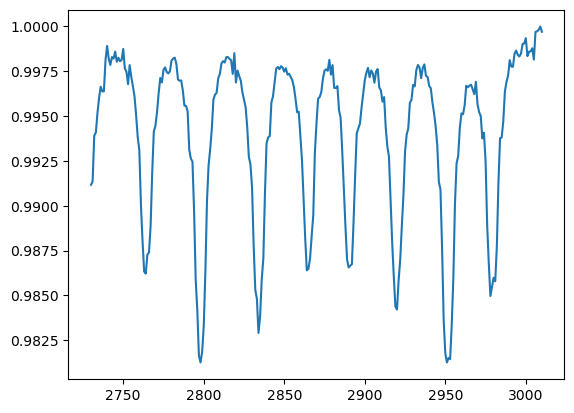

In [9]:
# import matplotlib.pyplot as plt
import numpy as np
# para crear modelos y ajustar datos. LorentzianModel y QuadraticModel son dos tipos 
# de modelos que se utilizan para ajustar los datos.
from lmfit.models import LorentzianModel, QuadraticModel 

def add_peak(prefix, center, amplitude=6, sigma=3):
    peak = LorentzianModel(prefix=prefix)
    pars = peak.make_params()
    pars[prefix + 'center'].set(center)
    pars[prefix + 'amplitude'].set(amplitude)
    pars[prefix + 'sigma'].set(sigma, min=0)
    return peak, pars
            
l,k = 1,1
ydat = np.array([ODMR2[i][l][k] for i in range(ODMR2.shape[0]) if True])
ydat = ydat/ydat.max()
xdat = freq
plt.plot(xdat,ydat)

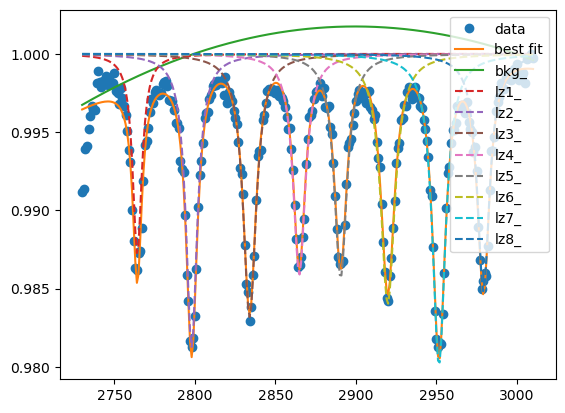

Los minimos son [2764.24555694 2798.00507797 2834.01081777 2864.86497836 2890.52087131
 2919.78499236 2951.57331602 2979.17900421]


In [10]:
model = QuadraticModel(prefix='bkg_')
params = model.make_params(a=0, b=0, c=0)

rough_peak_positions = (2760, 2800, 2837, 2860, 2880, 2920, 2950, 2970)
for i, cen in enumerate(rough_peak_positions):
    peak, pars = add_peak('lz%d_' % (i+1), cen)
    model = model + peak
    params.update(pars)

init = model.eval(params, x=xdat)
result = model.fit(ydat, params, x=xdat)
comps = result.eval_components()

# print(result.fit_report(min_correl=0.5))

plt.plot(xdat, ydat,'o', label='data')
plt.plot(xdat, result.best_fit, label='best fit')

for name, comp in comps.items():
    if name == 'bkg_':
        plt.plot(xdat,comps['bkg_'], label='bkg_')
    else:
        plt.plot(xdat, comp + 1, '--', label=name)
plt.legend(loc='upper right')

plt.savefig('./ODMR-pixel-particular')
plt.show()

# Acceder a los centros de lz1 y lz2
min1 = result.params['lz1_center'].value
min2 = result.params['lz2_center'].value
min3 = result.params['lz3_center'].value
min4 = result.params['lz4_center'].value
min5 = result.params['lz5_center'].value
min6 = result.params['lz6_center'].value
min7 = result.params['lz7_center'].value
min8 = result.params['lz8_center'].value
frecmin = np.array([min1,min2,min3,min4,min5,min6,min7,min8])

print(f"Los minimos son {frecmin}")

## Hacemos la iteración sobre los pixeles

In [11]:
############### iteramos sobre los pixeles

min1, min2, min3, min4, min5, min6, min7, min8 = 2760,2800, 2837, 2860, 2880, 2920, 2950, 2970
rough_peak_positions = (min1, min2, min3, min4, min5, min6, min7, min8) 

filas = []
for j in range(ODMR2.shape[1]):
    columna = []
    for k in range(ODMR2.shape[2]): 
        for i in range(ODMR2.shape[0]):
            ydat = np.array([ODMR2[i][j][k] for i in range(ODMR2.shape[0]) if True])
    
        ydat = ydat/ydat.max()
        xdat = freq
        
        model = QuadraticModel(prefix='bkg_')
        params = model.make_params(a=0, b=0, c=0)
        
        rough_peak_positions = (min1, min2, min3, min4, min5, min6, min7, min8)
        for i, cen in enumerate(rough_peak_positions):
            peak, pars = add_peak('lz%d_' % (i+1), cen)
            model = model + peak
            params.update(pars)
            
        init = model.eval(params, x=xdat)
        result = model.fit(ydat, params, x=xdat)
        comps = result.eval_components()
        
        # Acceder a los centros de lz1 y lz2
        valores = [] # valores de frecuencia 
        min1 = result.params['lz1_center'].value
        valores.append(min1)
        min2 = result.params['lz2_center'].value
        valores.append(min2)
        min3 = result.params['lz3_center'].value
        valores.append(min3)
        min4 = result.params['lz4_center'].value
        valores.append(min4)
        min5 = result.params['lz5_center'].value
        valores.append(min5)
        min6 = result.params['lz6_center'].value
        valores.append(min6)
        min7 = result.params['lz7_center'].value
        valores.append(min7)
        min8 = result.params['lz8_center'].value
        valores.append(min8)
        
        columna.append(np.array(valores))
    print(j)
        
    filas.append(np.array(columna))

frecuencias = np.array(filas)
frecuencias.shape        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


(64, 64, 8)

## Guardamos el array de frecuencias importante

In [12]:
# Guardar el array en un archivo de texto
# Guardar el array en un archivo .npy
np.save('./frecuencias-calculadas-64pixeles-en-1.npy', frecuencias)

## Cuando sea importante extraemos el array de frecuencias

In [13]:
# Cargar el array desde el archivo de texto
frecuencias = np.load('./frecuencias-calculadas-64pixeles-en-1.npy')

print("Array cargado desde 'frecuencias-calculadas-64pixeles-en-1.npy':")

Array cargado desde 'frecuencias-calculadas-64pixeles-en-1.npy':


## Graficamos las frecuencias del 1-8

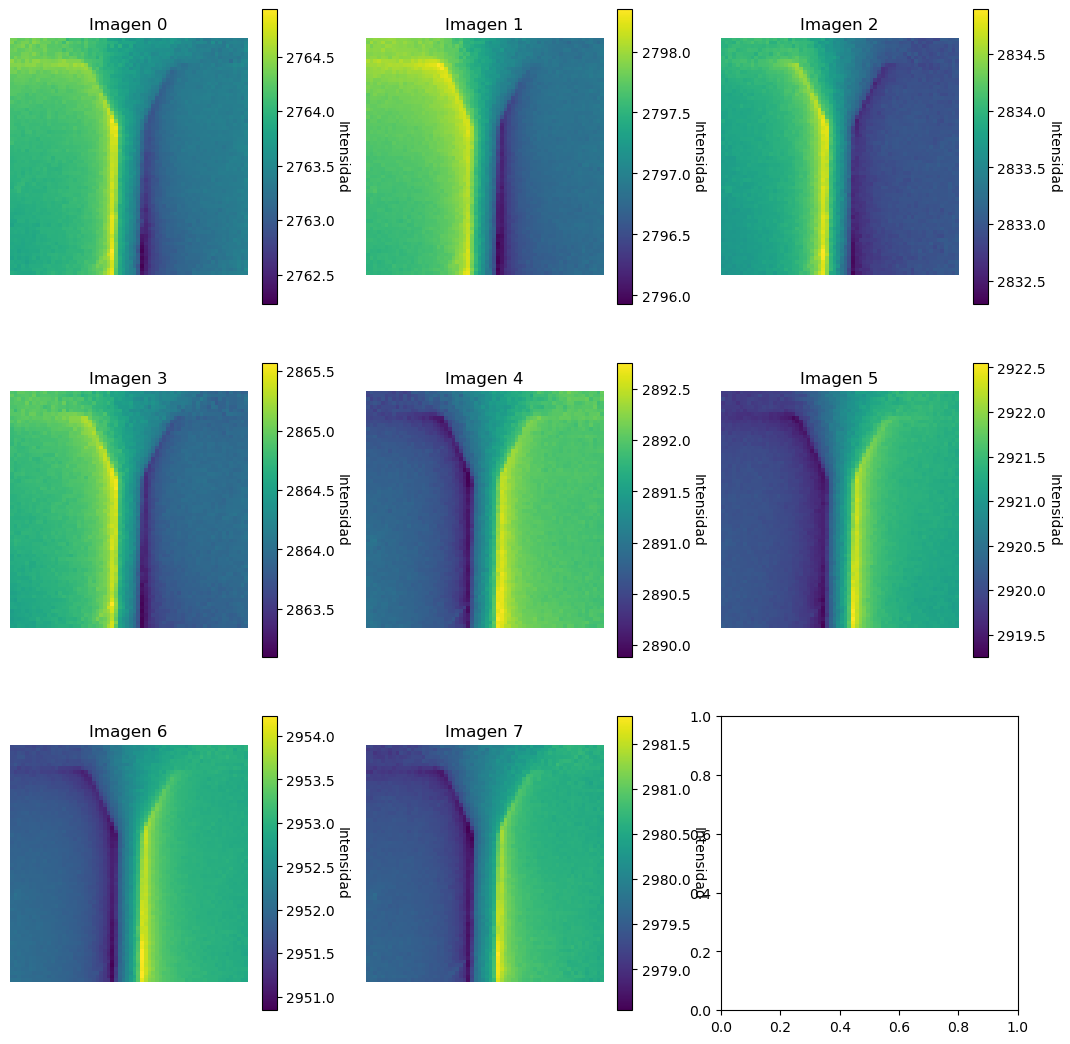

In [14]:
# Crear una figura con 6 subplots organizados en 2 filas y 3 columnas
fig, axes = plt.subplots(3, 3, figsize=(13, 13))

# Iterar sobre los subplots y las imágenes
for ax, idx in zip(axes.flat, range(0, 8)):
    frecuencia = frecuencias[:,:,idx]
    im = ax.imshow(frecuencia, cmap='viridis')
    ax.set_title(f'Imagen {idx}')
    ax.axis('off')  # Opcional: desactivar los ejes
    
    # Añadir una barra de color para cada imagen
    cbar = plt.colorbar(im, ax=ax, orientation='vertical')
    cbar.ax.set_ylabel('Intensidad', rotation=270, labelpad=10)

plt.savefig('./frecuencias-calculadas-64pixeles-en-1.png')
plt.show()

# Calculamos las proyecciones de los campos magnéticos

In [15]:
frecuencias.shape

(64, 64, 8)

In [16]:
#################################################################################3
## Hallando los ejes de simetria
filas = []
for i in range(frecuencias.shape[0]):
    columna = []
    for j in range(frecuencias.shape[1]): 
        campos = []
        for k in range(1,5):
            
            B_NV = (frecuencias[i,j,-k] -frecuencias[i,j,k-1])/(2*28)*10**3 # Esto segun el paper sale en Gauss el campo magnetico
            campos.append(B_NV)
            
        columna.append(np.array(campos))  
    
    filas.append(np.array(columna))
    
proyecciones_campos = np.array(filas)
proyecciones_campos.shape  

(64, 64, 4)

## Graficamos las 4 proyecciones de campos magneticos

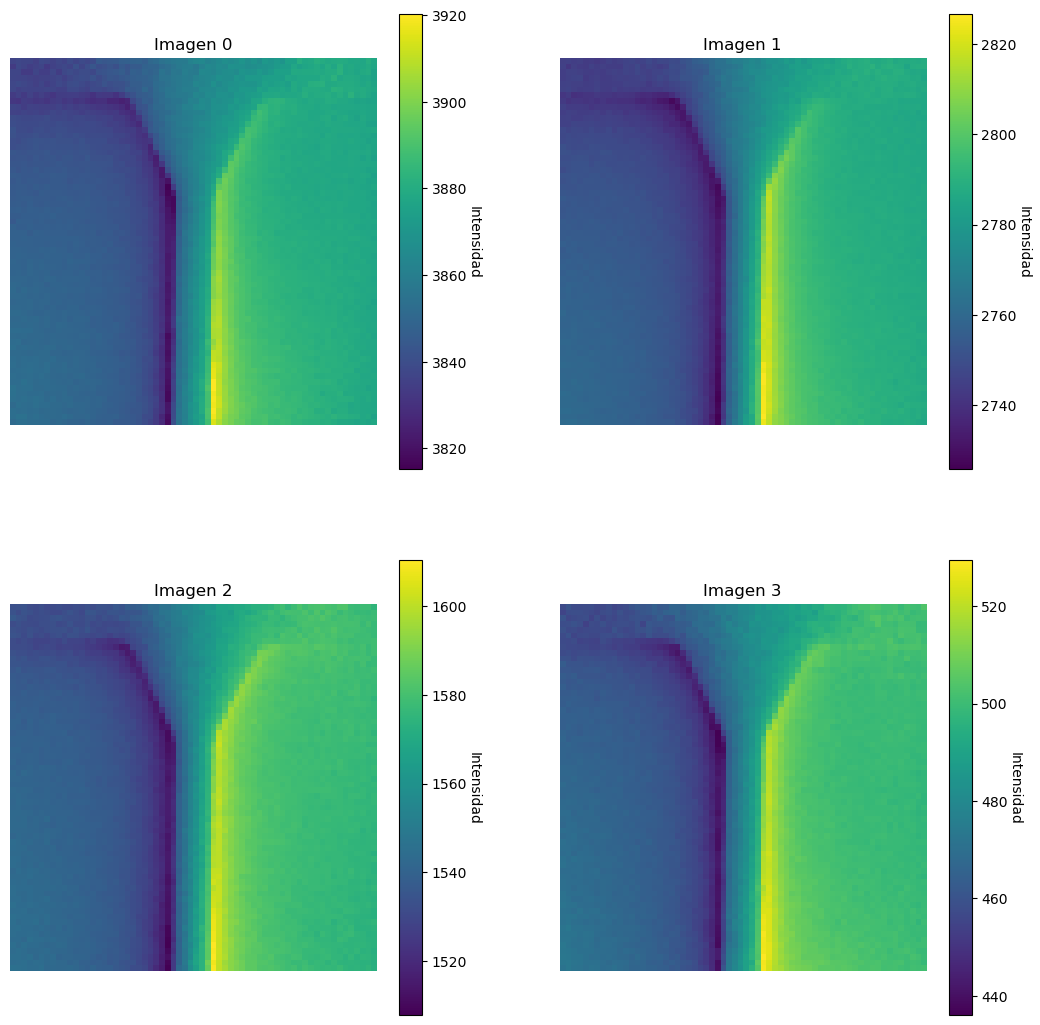

In [17]:
# Crear una figura con 6 subplots organizados en 2 filas y 3 columnas
fig, axes = plt.subplots(2, 2, figsize=(13, 13))

# Iterar sobre los subplots y las imágenes
for ax, idx in zip(axes.flat, range(0, 4)):
    campo = proyecciones_campos[:,:,idx]
    im = ax.imshow(campo, cmap='viridis')
    ax.set_title(f'Imagen {idx}')
    ax.axis('off')  # Opcional: desactivar los ejes
    
    # Añadir una barra de color para cada imagen
    cbar = plt.colorbar(im, ax=ax, orientation='vertical')
    cbar.ax.set_ylabel('Intensidad', rotation=270, labelpad=10)

fig.savefig('./proyecciones-campo-magnetico-calculadas-64pixeles-en-1.png')
plt.show()

# Calculamos ahora los 3 campos magneticos en los ejes x,y,z y campo magnetico total

In [18]:
######################################################################################33

### Sistemas de referencia
baseB = np.eye(3)
baseB_ = np.array([[0,-np.sqrt(2/3),-np.sqrt(1/3)],
                   [np.sqrt(2/3),0,-np.sqrt(1/3)],
                   [-np.sqrt(2/3),0,-np.sqrt(1/3)],
                   [0,np.sqrt(2/3),-np.sqrt(1/3)]])

# Definir la matriz de coeficientes A (4 ecuaciones y 3 incógnitas)
A = np.array([[baseB_[0] @ baseB[0].T, baseB_[0] @ baseB[1].T, baseB_[0] @ baseB[2].T],
            [baseB_[1] @ baseB[0].T, baseB_[1] @ baseB[1].T, baseB_[1] @ baseB[2].T],
            [baseB_[2] @ baseB[0].T, baseB_[2] @ baseB[1].T, baseB_[2] @ baseB[2].T],
            [baseB_[3] @ baseB[0].T, baseB_[3]@ baseB[1].T, baseB_[3] @ baseB[2].T]])

filas = []
for i in range(proyecciones_campos.shape[0]):
    columna = []
    for j in range(proyecciones_campos.shape[1]): 
        # Definir el vector de términos independientes b
        b = np.array([proyecciones_campos[i,j,0],
                      proyecciones_campos[i,j,1],
                      proyecciones_campos[i,j,2],
                      proyecciones_campos[i,j,3]])
        solution, residuals, rank, singular_values = np.linalg.lstsq(A, b, rcond=None)
        
        Bx = solution[0]
        By = solution[1]
        Bz = solution[2]
        B = (Bx**2 + By**2 + Bz**2)**(1/2)
    
        columna.append(np.array([Bx,By,By,B]))

    filas.append(columna)

campos_magneticos = np.array(filas)
campos_magneticos.shape

(64, 64, 4)

## Graficamos los campos magneticos

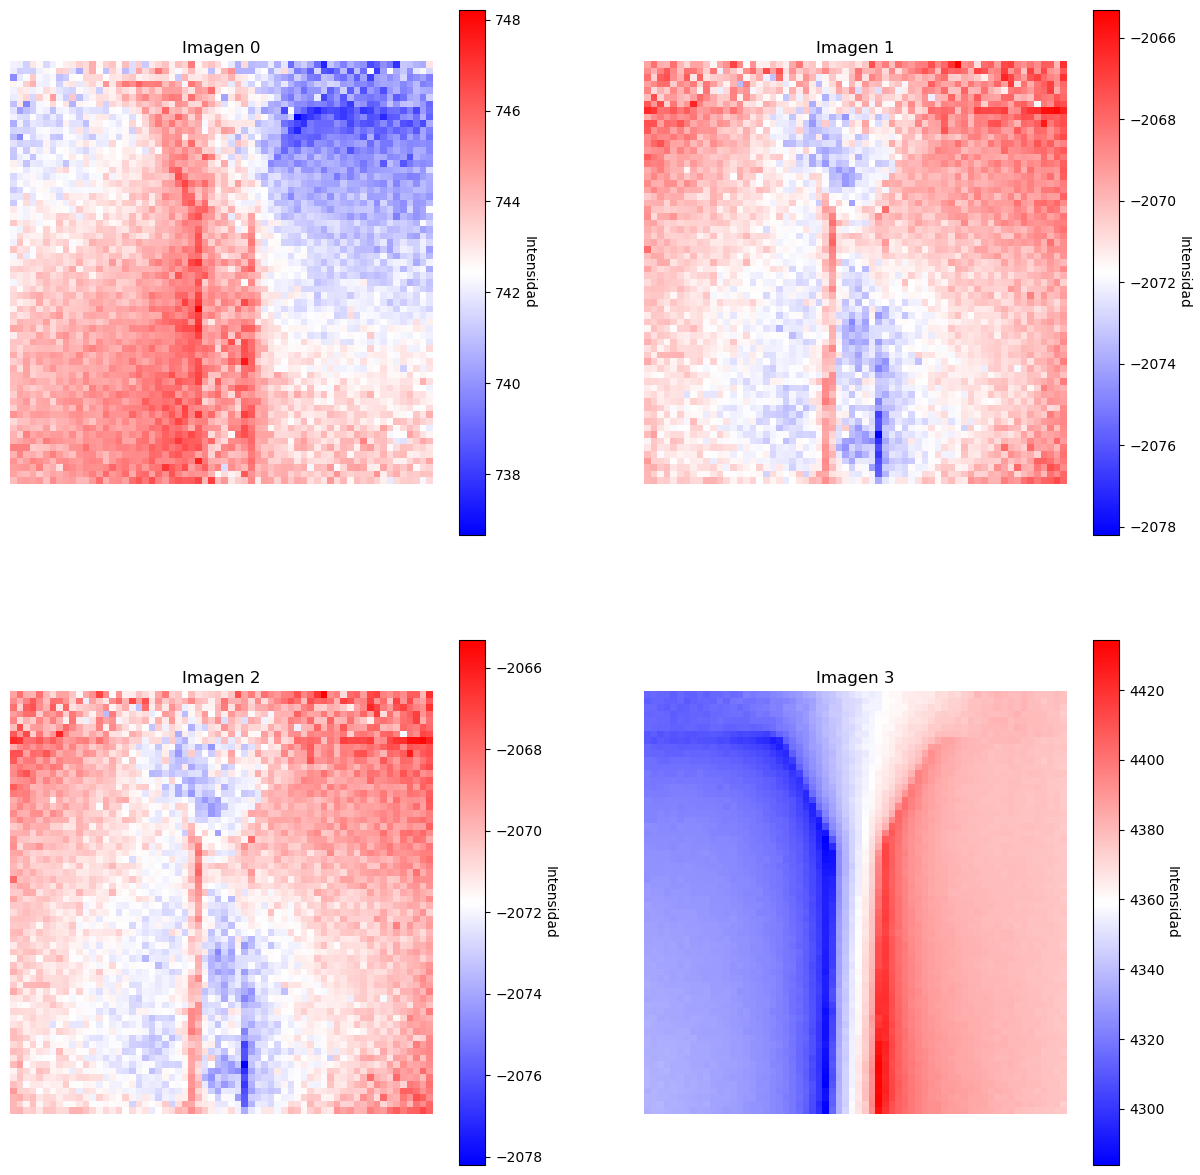

In [19]:
# Crear una figura con 6 subplots organizados en 2 filas y 3 columnas
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Iterar sobre los subplots y las imágenes
for ax, idx in zip(axes.flat, range(0, 4)):
    campo = campos_magneticos[:,:,idx]
    im = ax.imshow(campo, cmap='bwr')
    ax.set_title(f'Imagen {idx}')
    ax.axis('off')  # Opcional: desactivar los ejes
    
    # Añadir una barra de color para cada imagen
    cbar = plt.colorbar(im, ax=ax, orientation='vertical')
    cbar.ax.set_ylabel('Intensidad', rotation=270, labelpad=10)

fig.savefig('./Campos-magneticos-calculadas-64pixeles-en-1.png')

In [20]:
# Guardar el array en un archivo .npy
np.save('./campos-magneticos-calculadas-64pixeles-en-1.npy', campos_magneticos)